In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

dataset_train = pd.read_csv('./Ash/df_reg_imp.csv')
dataset_train = dataset_train.drop(['Alley','MiscFeature','Fence','PoolQC'], axis = 1)

In [2]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.fit_transform(X_test[:, :])

In [5]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=400, num=11)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [1, 2, 3, 4, 5]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]
random_grid = {"n_estimators": n_estimators, 
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state=17)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=200, cv=3, verbose=2, random_state=17, n_jobs=-1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


d:\Python3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
123 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Python3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Python3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "d:\Python3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "d:\Python3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatc

{'n_estimators': 370,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [False],
              'max_depth': [26, 27, 28, 29, 30, 31, 32],
              'max_features': ['sqrt'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 3, 4],
              'n_estimators': [365, 370, 375]}

rf = RandomForestRegressor(random_state=17)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [16]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 126 candidates, totalling 378 fits


{'bootstrap': False,
 'max_depth': 28,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 370}

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf_best = RandomForestRegressor(n_estimators=370, max_depth=28, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, bootstrap=False, random_state=17)
rf_best.fit(X_train, y_train)
y_ts_pred = rf_best.predict(X_test)
print('test MSE: %.3f' % mean_squared_error(y_test, y_ts_pred))

test MSE: 692126172.632


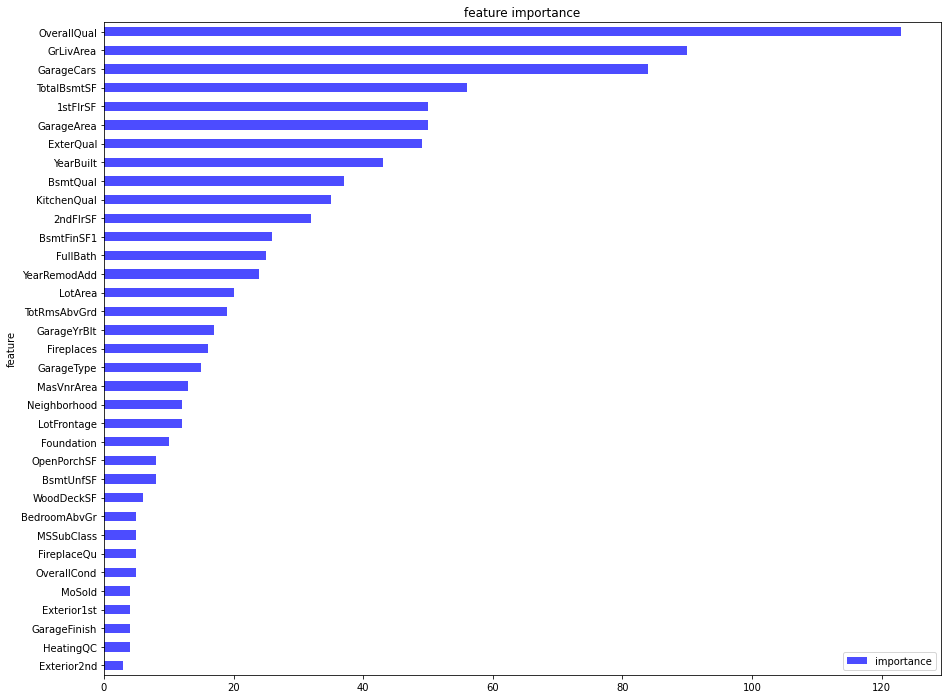

In [31]:
importances_values =  rf_best.feature_importances_

importances = pd.DataFrame(importances_values, columns=["importance"])
feature_data = pd.DataFrame(dataset_train.columns[:-1], columns=["feature"])
importance = pd.concat([feature_data, importances], axis=1)

importance = importance.sort_values(["importance"], ascending=True)
importance["importance"] = (importance["importance"] * 1000).astype(int)
importance = importance.sort_values(["importance"])[40:75]
importance.set_index('feature', inplace=True)
importance.plot.barh(color='b', alpha=0.7, rot=0, figsize=(15, 12))
plt.title("feature importance")
plt.show()

max_depth=10 train MSE: 59556419.544
max_depth=10 test MSE: 746209141.090


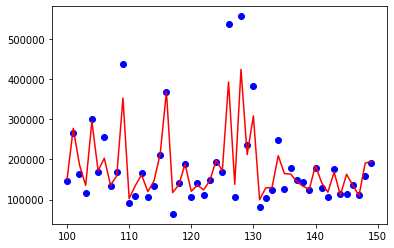

max_depth=20 train MSE: 3107147.041
max_depth=20 test MSE: 740156764.445


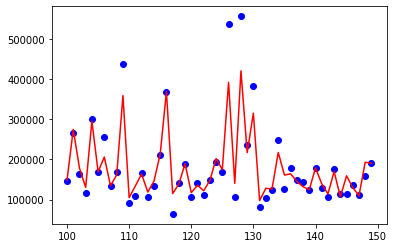

max_depth=28 train MSE: 3091626.333
max_depth=28 test MSE: 692126172.632


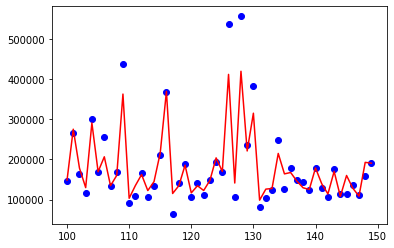

max_depth=35 train MSE: 3136920.045
max_depth=35 test MSE: 695308761.147


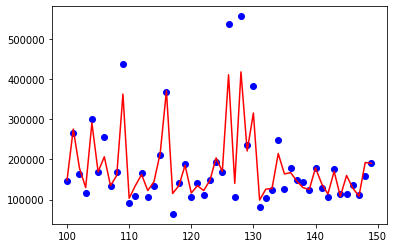

max_depth=40 train MSE: 3136920.045
max_depth=40 test MSE: 695308761.147


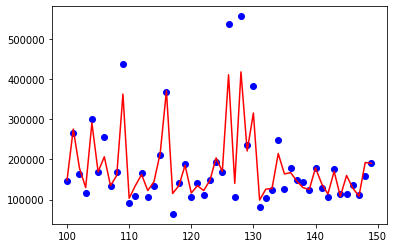

max_depth=50 train MSE: 3136920.045
max_depth=50 test MSE: 695308761.147


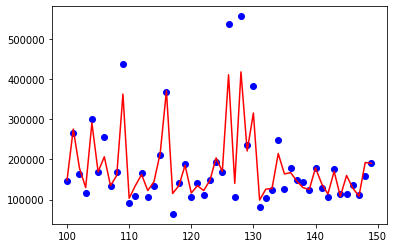

In [14]:
depthes = [10, 20, 28, 35, 40, 50]
for i in depthes:
    rfr = RandomForestRegressor(n_estimators=370, max_depth=i, max_features='sqrt', min_samples_leaf=1, min_samples_split=3, bootstrap=False, random_state=17)
    X_rfr = rfr.fit(X_train, y_train)

    y_tr_pred = rfr.predict(X_train)
    y_ts_pred = rfr.predict(X_test)
    print('max_depth=%d train MSE: %.3f' % (i, mean_squared_error(y_train, y_tr_pred)))
    print('max_depth=%d test MSE: %.3f' % (i, mean_squared_error(y_test, y_ts_pred)))

    START_POINT = 100
    END_POINT = 150
    x = np.arange(START_POINT, END_POINT)
    plt.plot(x, y_ts_pred[START_POINT:END_POINT],color = 'red')
    plt.scatter(x, y_test[START_POINT:END_POINT],color = 'blue')

    plt.show()